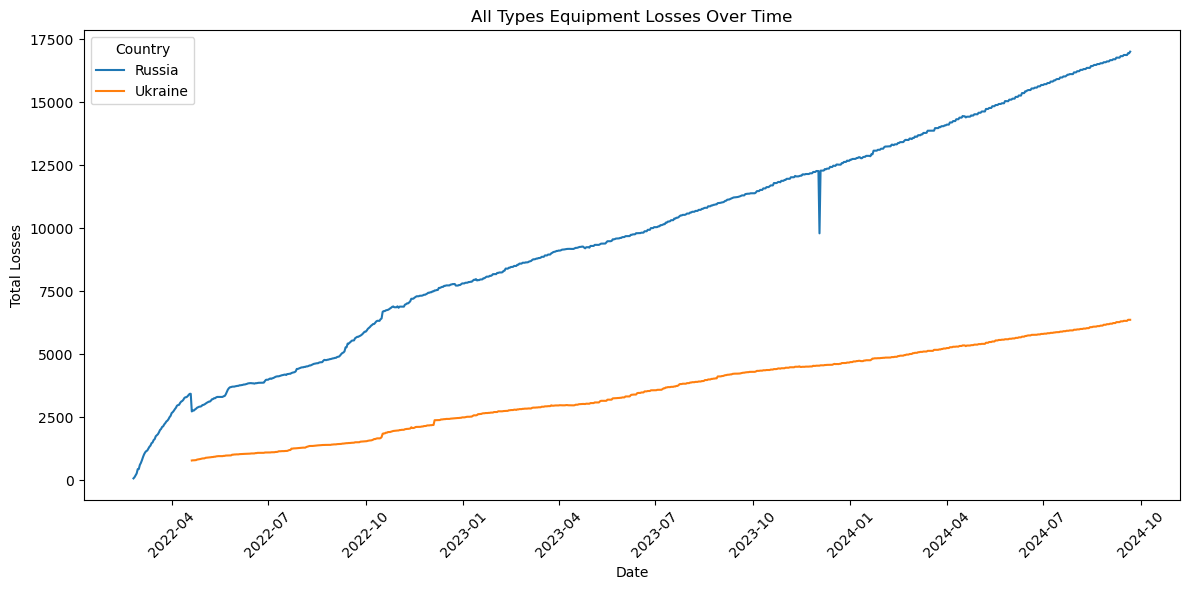

           date  country origin equipment_type  destroyed  abandoned  \
0    2023-05-18   Russia    NaN      All Types     6085.0      253.0   
355  2024-03-07  Ukraine    NaN      All Types     3514.0       88.0   
743  2023-03-24   Russia    NaN      All Types     5606.0      250.0   
1091 2023-07-13  Ukraine    NaN      All Types     2426.0       68.0   
1423 2024-03-09   Russia    NaN      All Types     9502.0      365.0   

      captured  damaged  type_total  
0       2480.0    668.0      9486.0  
355      886.0    603.0      5091.0  
743     2484.0    617.0      8957.0  
1091     826.0    372.0      3692.0  
1423    2597.0   1265.0     13729.0  


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

df = pd.read_csv('outputfiles/combined_totals.csv')

df['date'] = pd.to_datetime(df['date'])

# Filter for 'All Types' data
all_types_df = df[(df['equipment_type'] == 'All Types')]

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_types_df, x='date', y='type_total', hue='country')

plt.title('All Types Equipment Losses Over Time')
plt.xlabel('Date')
plt.ylabel('Total Losses')
plt.xticks(rotation=45)
plt.legend(title='Country')

plt.tight_layout()
plt.savefig('plots/all_types_over_time.png')
plt.show()

print(all_types_df.head())

# countries = all_types_df['country'].unique()

# fig, axes = plt.subplots(len(countries), 1, figsize=(12, 6*len(countries)), sharex=True)
# fig.suptitle('All Types Equipment Losses Over Time by Country')

# for i, country in enumerate(countries):
#     country_data = all_types_df[all_types_df['country'] == country]
#     sns.lineplot(data=country_data, x='date', y='type_total', ax=axes[i])
#     axes[i].set_title(f'{country}')
#     axes[i].set_xlabel('Date')
#     axes[i].set_ylabel('Total Losses')
#     axes[i].tick_params(axis='x', rotation=45)

# plt.tight_layout()
# plt.show()

# TODO: Need to remove one of the data points form russia data. Some kind of error

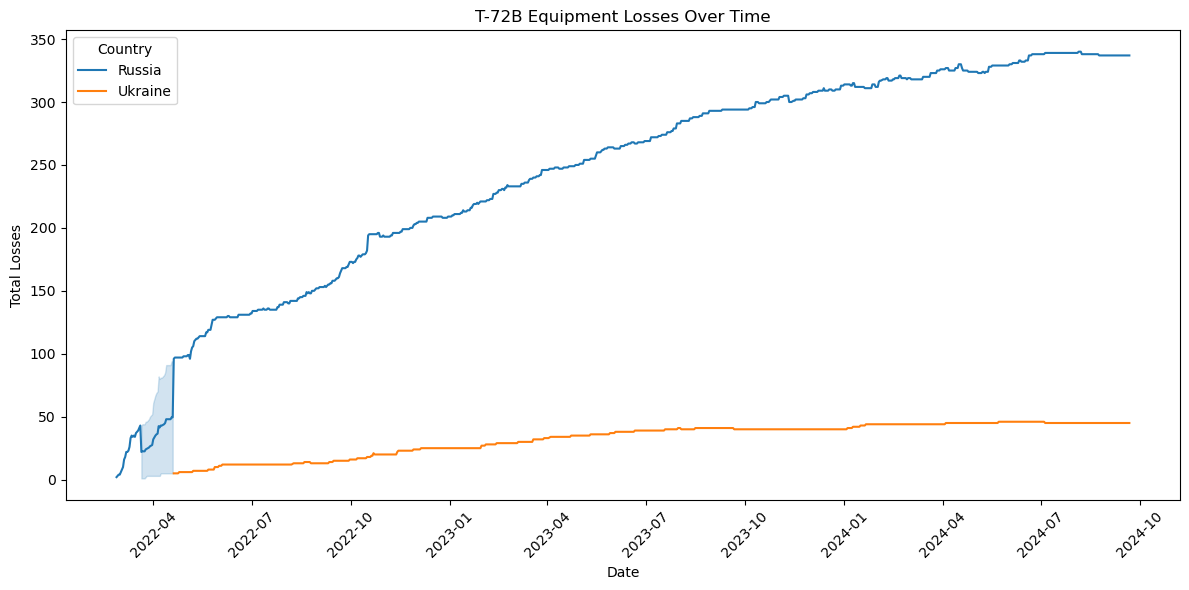

           date  country                 origin equipment_type  destroyed  \
301  2023-05-18   Russia  23px-Soviet Union.svg      270 T-72B      166.0   
568  2024-03-07  Ukraine  23px-Soviet Union.svg       45 T-72B       36.0   
1038 2023-03-24   Russia  23px-Soviet Union.svg      252 T-72B      153.0   
1275 2023-07-13  Ukraine  23px-Soviet Union.svg       40 T-72B       29.0   
1839 2024-03-09   Russia  23px-Soviet Union.svg      328 T-72B      218.0   

      abandoned  captured  damaged  type_total  
301        10.0      65.0     19.0       260.0  
568         0.0       5.0      3.0        44.0  
1038        5.0      65.0     18.0       241.0  
1275        0.0       7.0      3.0        39.0  
1839       15.0      62.0     23.0       318.0  


In [5]:
def filter_equipment(df, equipment_pattern):
    return df[df['equipment_type'].str.contains(equipment_pattern, regex=True, na=False)]

# equipment_type = 'T-90M'
# equipment_type = 'T-72BA'
equipment_type = 'T-72B'

# pattern = r'^\d*\s*' + re.escape(equipment_type)
# pattern = r'^\d*\s*' + re.escape(equipment_type) + r'($|\s)'
# pattern = r'^\d*\s*' + re.escape(equipment_type) + r'($|\s)'
pattern = r'^\d*\s*' + re.escape(equipment_type) + r'$'

filtered_df = filter_equipment(df, pattern)

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='date', y='type_total', hue='country')

plt.title(f'{equipment_type} Equipment Losses Over Time')
plt.xlabel('Date')
plt.ylabel('Total Losses')
plt.xticks(rotation=45)
plt.legend(title='Country')

plt.tight_layout()
plt.savefig(f'plots/{equipment_type}_losses.png')
plt.show()

print(filtered_df.head())